<a href="https://colab.research.google.com/github/eplaie/O-Problema-do-Corte-M-nimo-de-Arestas-como-Medida-de-Desempenho-de-uma-Rede-de-Computadores/blob/main/TrabalhoFInalAEDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

In [4]:
def plot_graph(graph, graph_name, cut_partition=None):
    plt.figure(figsize=(8, 8))
    plt.title(f'Grafo: {graph_name}')

    pos = nx.spring_layout(graph, seed=42)  #layout

    if cut_partition:
        # Pintar os vértices de uma partição de azul e da outra partição de amarelo
        node_colors = ['b' if node in cut_partition[0] else 'y' for node in graph.nodes]

        nx.draw(graph, pos, with_labels=False, node_color=node_colors, edge_color='c', node_size=10, linewidths=1)

        cut_edges = [(u, v) for u, v in graph.edges() if (u in cut_partition[0] and v in cut_partition[1]) or (v in cut_partition[0] and u in cut_partition[1])]
        nx.draw_networkx_edges(graph, pos, edgelist=cut_edges, edge_color='r', width=2)
    else:
        nx.draw(graph, pos, with_labels=False, edge_color='c', node_size=10, linewidths=1)

    # Exibe o gráfico
    plt.show()

In [5]:
# Função para ler dados do arquivo CSV e criar um grafo
def read_csv_to_graph(csv_filename):
    df = pd.read_csv(csv_filename)
    edges = [(row['source'], row['target']) for _, row in df.iterrows()]
    graph = nx.Graph(edges)
    return graph

In [6]:
def exact_cut(graph):
    # Calculando o corte mínimo usando networkx
    start_time = time.time()
    cut_value, partition = nx.stoer_wagner(graph)
    elapsed_time = time.time() - start_time

    return cut_value, partition, elapsed_time

Grafo: g7
Número de vértices: 148
Número de arestas: 788
Grau máximo: 50
Grau mínimo: 4
Densidade: 0.07243978672550101
Raio: 4
Diâmetro: 6
Grafo: g12
Número de vértices: 1733
Número de arestas: 247300
Grau máximo: 486
Grau mínimo: 4
Densidade: 0.1647812001508551
Raio: 3
Diâmetro: 5


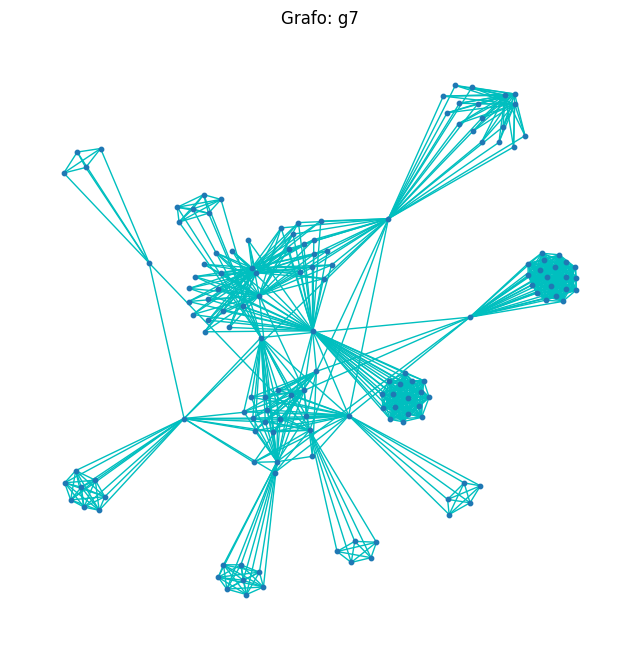

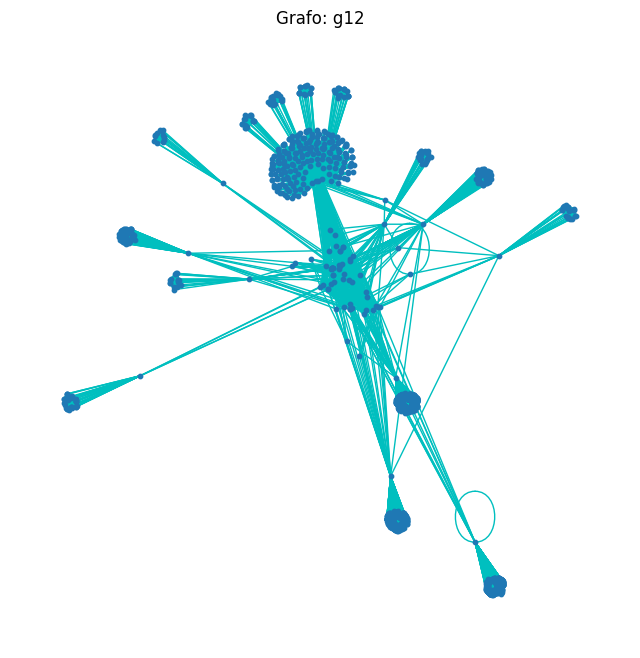

a
b
c


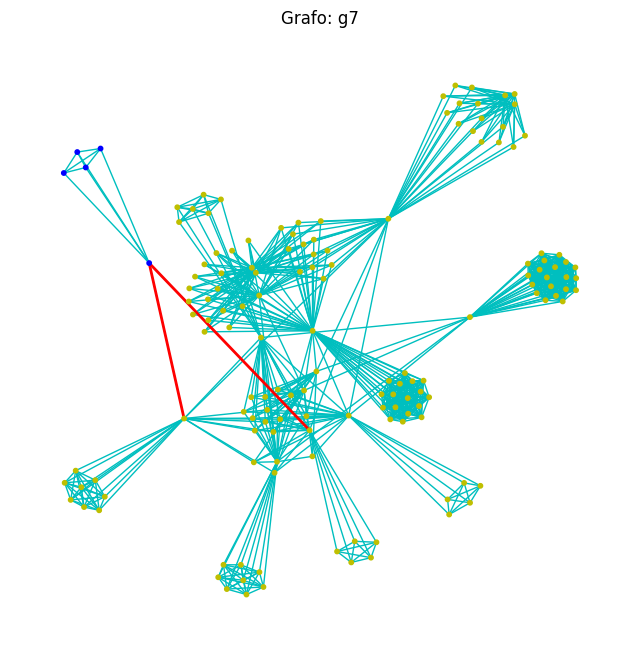

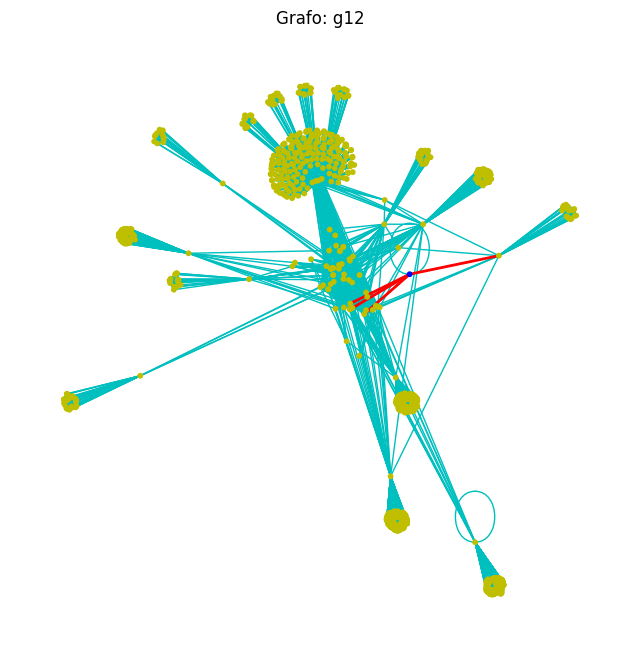

Corte Mínimo de g7: 2
Tempo de execução de g7: 0.151233 segundos

Corte Mínimo de g12: 4
Tempo de execução de g12: 495.194054 segundos


In [7]:
def extrair_informacoes_grafo(graph, graph_name):
    # Número de vértices
    num_vertices = len(graph.nodes())

    # Número de arestas
    num_arestas = len(graph.edges())

    # Grau máximo
    grau_maximo = max(dict(graph.degree()).values())

    # Grau mínimo
    grau_minimo = min(dict(graph.degree()).values())

    # Densidade
    densidade = nx.density(graph)

    # Raio (menor excentricidade)
    raio = nx.radius(graph)

    # Diâmetro (maior excentricidade)
    diametro = nx.diameter(graph)

    print(f"Grafo: {graph_name}")
    print(f"Número de vértices: {num_vertices}")
    print(f"Número de arestas: {num_arestas}")
    print(f"Grau máximo: {grau_maximo}")
    print(f"Grau mínimo: {grau_minimo}")
    print(f"Densidade: {densidade}")
    print(f"Raio: {raio}")
    print(f"Diâmetro: {diametro}")

# Nomes dos arquivos CSV
g7_csv_filename = 'g7.csv'
g12_csv_filename = 'g12.csv'

# Le os dados dos arquivos CSV para criar grafos
g7_graph = read_csv_to_graph(g7_csv_filename)
g12_graph = read_csv_to_graph(g12_csv_filename)


# Extrair parametros dos grafos
extrair_informacoes_grafo(g7_graph, 'g7')
extrair_informacoes_grafo(g12_graph, 'g12')

# Plota os grafos normais
plot_graph(g7_graph, 'g7')
plot_graph(g12_graph, 'g12')

# Calcula o corte mínimo e obtém a partição
print("a")
g7_cut_value, g7_partition, g7_elapsed_time = exact_cut(g7_graph)
print("b")
g12_cut_value, g12_partition, g12_elapsed_time = exact_cut(g12_graph)
print("c")

# Plota os grafos com destaque para o corte mínimo
plot_graph(g7_graph, 'g7', g7_partition)
plot_graph(g12_graph, 'g12', g12_partition)

# Imprime os valores dos cortes mínimos e os tempos de execução
print(f"Corte Mínimo de g7: {g7_cut_value}")
print(f"Tempo de execução de g7: {g7_elapsed_time:.6f} segundos")

print(f"\nCorte Mínimo de g12: {g12_cut_value}")
print(f"Tempo de execução de g12: {g12_elapsed_time:.6f} segundos")